# Data Manipulation to Make viz work

In [1]:
import pandas as pd
import altair as alt
import json
import os

## exploration

In [2]:
files = ['viz_BobPalmer.json',
       'viz_gatsbyjs.json', 
       'viz_getnikola.json',
       'viz_novus.json',
       'viz_OneDrive.json',
       'viz_rathena.json',
       'viz_Tribler.json',
       'viz_waffleio.json'
      ]

In [3]:
def regroupModularity(data, key='modularity'):
    d = pd.DataFrame.from_dict(data[key], orient='index')
    
    d.index = pd.to_datetime(d.index)
    d = d.sort_index().reset_index()
    d = d.groupby(pd.Grouper(key='index', freq='W-MON')).sum()
    
    d.index = d.index.strftime('%Y-%m-%d')
    
    d.columns = [key]
    return d

In [252]:
def regroupLinkCount(data, key='links'):
    d = pd.DataFrame.from_dict(data[key], orient='columns')
    
    d.timestamp = pd.to_datetime(d.timestamp)
    d_grouped = d.groupby([pd.Grouper(key='timestamp', freq='W-MON')]).count()
    d_grouped = d_grouped.iloc[:,1]
    
    d_grouped.index = d_grouped.index.strftime('%Y-%m-%d')
    
    return d_grouped

In [255]:
def fixData(files):
    for file in files:
        with open(os.path.join('..', file)) as f:
            data = json.load(f)
            
        modularity = regroupModularity(data)        
        data['modularity'] = modularity.to_dict()['modularity']
        
        data['no_links'] = regroupLinkCount(data).to_dict()
        
        with open(os.path.join('.', file), 'w') as f:
            json.dump(data, f)

In [257]:
fixData(files)

## some plots

In [218]:
file = 'viz_Tribler.json'
with open(os.path.join('.', file)) as f:
    data = json.load(f)

### modularity

In [219]:
modularity = pd.DataFrame.from_dict(data['modularity'], orient='index')
modularity.columns = ['modularity']

In [220]:
modChart = alt.Chart(modularity.reset_index()).mark_line().encode(
    alt.Y(shorthand='modularity:Q'),
    alt.X(shorthand='index:T')
)

### Links

In [221]:
links = pd.DataFrame.from_dict(data['links'], orient='columns')

In [222]:
links.head()
links.timestamp = pd.to_datetime(links.timestamp)

In [223]:
no_links = links.groupby([pd.Grouper(key='timestamp', freq='W-MON')]).count()

In [224]:
linksChart = alt.Chart(no_links.reset_index()).mark_line().encode(
    alt.X('timestamp:T'),
    alt.Y('rel_type:Q')
)

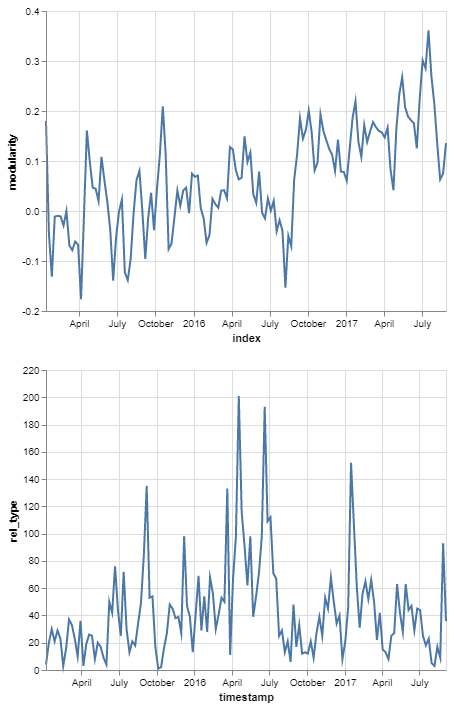

In [225]:
modChart & linksChart